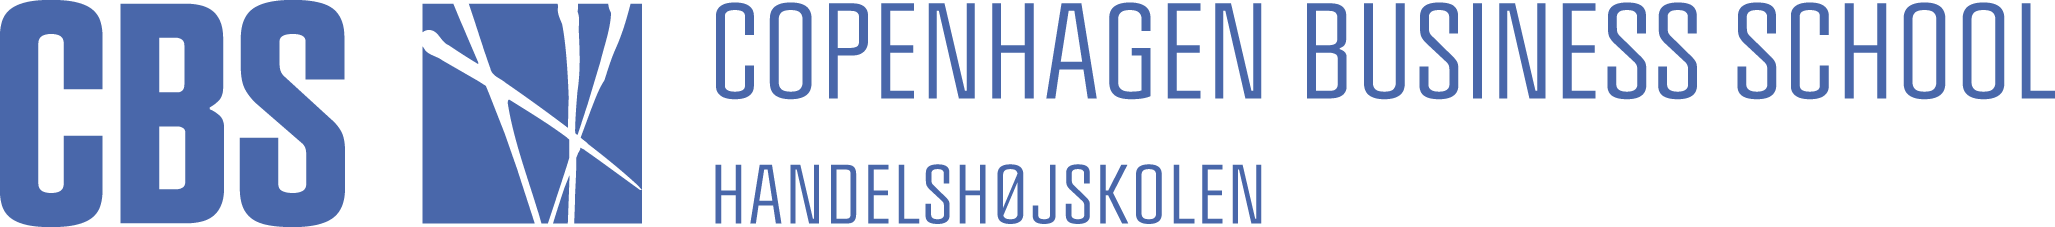

# <font color='Red'>Final Exam Project for: Natural Language Processing and Text Analytics</font> 
### <font color='Orange'>Part 2</font> 


## <font color='Blue'>By: Ioannis Antoniou (142000) , and M’hamed Khedraoui Idrissi (142908)</font> 

In [159]:
import numpy as np 
import pandas as pd 
import numpy as np
import pandas as pd 
import nltk
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import warnings
from collections import Counter
# from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import spacy
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import nltk
from nltk.corpus import movie_reviews
import random
from prettytable import PrettyTable
import textwrap 
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

In [39]:
# !pip install prettytable

In [40]:
missing_values = ["n/a", "na","NA","NaN", "--", "Not Answer","Not_Answer"]

In [41]:
df = pd.read_csv('C:/Users/Yannis/Desktop/NLP/Suspicious Communication on Social Platforms.csv', na_values = missing_values)

In [42]:
df.head()

,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [43]:
df.groupby('tagging').describe()

comments                    
           count unique     top freq
tagging                             
0          12179  11861  #NAME?   23
1           7822   2789  #NAME?   18

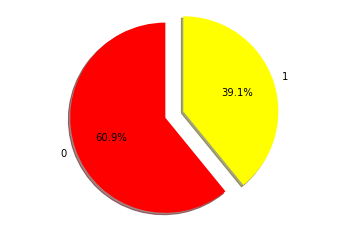

In [44]:
count_Class = pd.value_counts(df.tagging, sort = True)

# Data to Plot
labels = '0', '1'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'yellow']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [45]:
df.isnull().sum()

comments    0
tagging     0
dtype: int64

### Function that prints features with the highest coefficient values, per class

In [192]:

def get_most_informative_features(clf, vectorizer, 
                                  label_names, 
                                  max_number_informative_features):

    output = []

    
    try:
        feature_names = vectorizer.get_feature_names()

        label_index = len(label_names)
        
        if label_index == 2:
            label_index = 1
            #print('features for binary classification!')
        
        for index in range(label_index):
            #print(str(index) + label_names[index])
            #print('clf.coef_:',len(clf.coef_))
            
            output.append('\n' + label_names[index] + ':\n')
            
            coefs_with_fns = sorted(zip(clf.coef_[index], feature_names))
            
            #print(coefs_with_fns)
            
            threshold = int(max_number_informative_features / 2)

            top = zip(coefs_with_fns[:threshold],
                      coefs_with_fns[:-(threshold + 1):-1])
            
            for (coef_1, fn_1), (coef_2, fn_2) in top:
                feat = "\t%.4f\t%-15s\t\t%.4f\t%-15s" % (coef_1, fn_1, coef_2, fn_2)
                output.append(feat)
            
            #print('\n'.join(output))
                
    except:
        print("Unexpected error:", sys.exc_info()[0])
        raise 
        return '\n'.join(output)

    return '\n'.join(output)


In [191]:
def get_key_categories(dict, value):
    
    if not value.isdigit():
        return None
    
    for key, val in dict.items():
        if val == int(value):
            return key
    
    return None
    

In [48]:
X = df['comments']
y = df['tagging']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
## Add lemmatizer
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])
def LemmaTokenizer(X):
    
    for comment in X:
        doc= nlp(comment)
        ' '.join([token.lemma_ for token in doc])


In [169]:
# Use lemmaTokenizer within count vectorizer with greater word sequences 
# tokenizer = LemmaTokenizer(X)

cv = CountVectorizer()
X_Trainvec = cv.fit_transform(X_train)
X_train.shape
X_Trainvec.shape

(15000, 14686)

In [170]:
X_Testvec = cv.transform(X_test)

In [266]:
df_red = pd.read_csv('toxic_reddit_tagged.csv', na_values = missing_values)

X_test_red = df_red["comments"]
y_test_red = df_red['tagging']

X_Testvec_red = cv.transform(X_test_red)


## Logistic Regression

In [172]:
lr = LogisticRegression()

lr.fit(X_Trainvec, y_train)
lr_score = lr.score(X_Trainvec, y_train)
print("Train", lr_score)
lr_score = lr.score(X_Testvec, y_test)
print( "Test",lr_score)

Train 0.9342666666666667
Test 0.8234353129374126


E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [173]:
pred = lr.predict(X_Testvec)
no_of_features = lr.n_features_in_

In [174]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      2859
           1       0.82      0.75      0.78      2142

    accuracy                           0.82      5001
   macro avg       0.82      0.81      0.82      5001
weighted avg       0.82      0.82      0.82      5001



### Perform LR for Reddit dataset

In [175]:
lr_score = lr.score( X_Testvec_red, y_test_red)
print( "Test",lr_score)

Test 0.5655684179281686


In [176]:
pred = lr.predict(X_Testvec_red)
print(classification_report(pred,y_test_red))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69     15022
           1       0.16      0.71      0.26      1823

    accuracy                           0.57     16845
   macro avg       0.55      0.63      0.48     16845
weighted avg       0.85      0.57      0.65     16845



**In the above model, we used unigrams (single words) only. This is the default for count_vectorizer. Below, we will create a Pipeline, consisting of Countvectorizer, TfidfTransformer, and LogisticRegression:**

In [193]:
cat_mapping = {'neg': 1, 'pos': 0 }

cat_labels = list(cat_mapping.keys())

In [109]:
pipe_clf = Pipeline(
    [('vect', CountVectorizer(ngram_range = (1,3),
                              decode_error='ignore', 
                              stop_words='english',)),
     ('tfidf', TfidfTransformer()),
     ('clf', LogisticRegression()),
     ])

In [110]:
text_clf = pipe_clf.fit(X_train, y_train)

predictions = pipe_clf.predict(X_test)

In [111]:
print('accuracy (simple):', accuracy_score(y_test, predictions))

accuracy (simple): 0.7576484703059388


In [112]:
measures_info = metrics.classification_report(y_test, predictions, output_dict=True)

In [113]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


vectorizer = pipe_clf.named_steps['vect']

clf = pipe_clf.named_steps['clf']

feature_names = vectorizer.get_feature_names()


imp_features = get_most_informative_features(clf, vectorizer,cat_labels, 10)

print('Important Features:\n', imp_features)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |    0.78   | 0.838  |  0.808   |   3046  |
|  neg  |   0.715   | 0.632  |  0.671   |   1955  |
+-------+-----------+--------+----------+---------+
Important Features:
 
neg:

	-2.1687	nope           		6.2222	fuck           
	-2.0416	favorite       		6.0295	ass            
	-1.5882	idk            		5.7562	gay            
	-1.5112	im             		5.7298	emo            
	-1.4658	reason         		5.5438	bitch          


## Naive Bayes Classifier:

In [182]:
nb = MultinomialNB()

nb.fit(X_Trainvec, y_train)
nb_score = nb.score(X_Trainvec, y_train)
print("Train", nb_score)
nb_score = nb.score(X_Testvec, y_test)
print( "Test",nb_score)

Train 0.8816
Test 0.78624275144971


In [183]:
pred_nb = nb.predict(X_Testvec)

In [184]:
print(classification_report(pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3099
           1       0.71      0.73      0.72      1902

    accuracy                           0.79      5001
   macro avg       0.77      0.78      0.77      5001
weighted avg       0.79      0.79      0.79      5001



### Perform Naive Bayes Classifier from trained data to reddit dataset

In [185]:
pred_nb_red = nb.predict(X_Testvec_red)
print(classification_report(pred_nb_red,y_test_red))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66     12542
           1       0.31      0.59      0.41      4303

    accuracy                           0.57     16845
   macro avg       0.56      0.57      0.53     16845
weighted avg       0.68      0.57      0.59     16845



**Pipeline:**

In [186]:
pipe_mnb = Pipeline(
    [('vect', CountVectorizer(ngram_range = (1,3),
                              decode_error='ignore', 
                              stop_words='english', )),
     ('tfidf', TfidfTransformer()),
     ('mnb', MultinomialNB()),
     ])

In [187]:
text_mnb = pipe_mnb.fit(X_train, y_train)

predictions_mnb = pipe_mnb.predict(X_test)

In [188]:
print('accuracy (simple):', accuracy_score(y_test, predictions_mnb))

accuracy (simple): 0.7812437512497501


In [189]:
measures_info = metrics.classification_report(y_test, predictions_mnb, output_dict=True)

In [194]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


vectorizer = pipe_mnb.named_steps['vect']

mnb = pipe_mnb.named_steps['mnb']

feature_names = vectorizer.get_feature_names()


imp_features = get_most_informative_features(mnb, vectorizer,cat_labels, 10)

print('Important Features:\n', imp_features)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.775   | 0.903  |  0.834   |   3046  |
|  neg  |   0.797   | 0.591  |  0.679   |   1955  |
+-------+-----------+--------+----------+---------+
Important Features:
 
neg:

	-10.2595	000            		-4.8113	hate           
	-10.2595	0007           		-4.8267	fuck           
	-10.2595	00pm           		-5.0345	damn           
	-10.2595	04             		-5.0985	sucks          
	-10.2595	05             		-5.1205	ass            


E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


### MNB with Grid Search on reddit data

In [188]:
# tokenizer = LemmaTokenizer(X_train)

In [196]:
mnb_param_grid = { 
    'mnb__alpha': (1, 0.1, 0.01, 0.001,0.0001, 0.00001)
}

pipe_mnb_red = Pipeline(
    [('vect', CountVectorizer(  ngram_range = (1,3),
                                decode_error='ignore', 
                                stop_words='english',)),
     ('tfidf', TfidfTransformer()),
     ('mnb', MultinomialNB())
     ])

pipe_mnb_red.get_params()


{'memory': None,
 'steps': [('vect',
   CountVectorizer(decode_error='ignore', stop_words='english')),
  ('tfidf', TfidfTransformer()),
  ('mnb', MultinomialNB())],
 'verbose': False,
 'vect': CountVectorizer(decode_error='ignore', stop_words='english'),
 'tfidf': TfidfTransformer(),
 'mnb': MultinomialNB(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'ignore',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': 'english',
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'mnb__alpha': 1.0,
 'mnb__class_prior': None,
 'mnb__fit_prior': True}

In [197]:
# pipe_mnb

CV_mnp_reddit= GridSearchCV(pipe_mnb_red,
                            mnb_param_grid, cv= 25)

CV_mnp_reddit.fit(X_train,y_train)

print("best params: ",CV_mnp_reddit.best_params_, "best score: ", 
      CV_mnp_reddit.best_score_)

best params:  {'mnb__alpha': 0.0001} best score:  0.8230666666666666


In [198]:
best = CV_mnp_reddit.best_estimator_


predictions_mnb_red_gscv = best.predict(X_test_red)
print('accuracy (With Grid search):', 
      accuracy_score(y_test_red, predictions_mnb_red_gscv))

accuracy (With Grid search): 0.5392104482042149


In [199]:
print(classification_report(predictions_mnb_red_gscv,y_test_red))

              precision    recall  f1-score   support

           0       0.86      0.54      0.66     14078
           1       0.19      0.56      0.28      2767

    accuracy                           0.54     16845
   macro avg       0.53      0.55      0.47     16845
weighted avg       0.75      0.54      0.60     16845



## Decision Tree Classifier:

In [200]:
dt = DecisionTreeClassifier()

dt.fit(X_Trainvec, y_train)
dt_score = dt.score(X_Trainvec, y_train)
print("Train", dt_score)
dt_score = dt.score(X_Testvec, y_test)
print( "Test",dt_score)

Train 0.9955333333333334
Test 0.8504299140171966


In [201]:
pred_dt = dt.predict(X_Testvec)

In [202]:
print(classification_report(pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      2494
           1       0.95      0.74      0.83      2507

    accuracy                           0.85      5001
   macro avg       0.87      0.85      0.85      5001
weighted avg       0.87      0.85      0.85      5001



### Perform Decision Tree Classifier from trained data to reddit dataset

In [36]:
pred_dt_red = dt.predict(X_Testvec_red)
print(classification_report(pred_dt_red,y_test_red))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69     14927
           1       0.17      0.70      0.27      1918

    accuracy                           0.57     16845
   macro avg       0.55      0.63      0.48     16845
weighted avg       0.85      0.57      0.64     16845



**Pipeline:**

In [212]:
pipe_dt = Pipeline(
    [('vect', CountVectorizer(ngram_range = (1,3),
                              decode_error='ignore', 
                              stop_words='english', )),
     ('tfidf', TfidfTransformer()),
     ('dt', DecisionTreeClassifier()),
     ])

In [213]:
text_dt = pipe_dt.fit(X_train, y_train)

predictions_dt = pipe_dt.predict(X_test)

In [214]:
print('accuracy (simple):', accuracy_score(y_test, predictions_dt))

accuracy (simple): 0.8498300339932013


In [128]:
measures_info = metrics.classification_report(y_test, predictions_dt, output_dict=True)

In [129]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.961   | 0.786  |  0.865   |   3046  |
|  neg  |    0.74   |  0.95  |  0.832   |   1955  |
+-------+-----------+--------+----------+---------+


### Decision tree pipeline with Grid Search on reddit data

In [228]:
nodes = [i for i in range(40)]
dt_param_grid = { 
    'vect__ngram_range': [(1, 3)],
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [2,4,6,8,10,12],
    'dt__min_samples_split': [2, 3, 4],
    'dt__max_leaf_nodes': nodes,


}

pipe_dt_red = Pipeline(
    [('vect', CountVectorizer( ngram_range = (1,3),
                              stop_words='english', )),
     ('tfidf', TfidfTransformer()),
     ('dt', DecisionTreeClassifier()),
     
     ])

pipe_dt_red.get_params()

{'memory': None,
 'steps': [('vect', CountVectorizer(stop_words='english')),
  ('tfidf', TfidfTransformer()),
  ('dt', DecisionTreeClassifier())],
 'verbose': False,
 'vect': CountVectorizer(stop_words='english'),
 'tfidf': TfidfTransformer(),
 'dt': DecisionTreeClassifier(),
 'vect__analyzer': 'word',
 'vect__binary': False,
 'vect__decode_error': 'strict',
 'vect__dtype': numpy.int64,
 'vect__encoding': 'utf-8',
 'vect__input': 'content',
 'vect__lowercase': True,
 'vect__max_df': 1.0,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__ngram_range': (1, 1),
 'vect__preprocessor': None,
 'vect__stop_words': 'english',
 'vect__strip_accents': None,
 'vect__token_pattern': '(?u)\\b\\w\\w+\\b',
 'vect__tokenizer': None,
 'vect__vocabulary': None,
 'tfidf__norm': 'l2',
 'tfidf__smooth_idf': True,
 'tfidf__sublinear_tf': False,
 'tfidf__use_idf': True,
 'dt__ccp_alpha': 0.0,
 'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': None,
 'dt__max_features': None,
 'dt__

In [229]:
CV_dt_reddit= GridSearchCV(pipe_dt_red,
                            dt_param_grid, cv= 5)

CV_dt_reddit.fit(X_train,y_train)

print("best params: ",CV_dt_reddit.best_params_, "best score: ", 
      CV_dt_reddit.best_score_)

E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\tree\_classes.py", line 942, in fit


best params:  {'dt__criterion': 'gini', 'dt__max_depth': 6, 'dt__max_leaf_nodes': 24, 'dt__min_samples_split': 3, 'vect__ngram_range': (1, 3)} best score:  0.6938000000000001


In [269]:
# best_dt = CV_dt_reddit.best_estimator_

# OR recreate the best estimator if you run out of memory like me

pipe_dt_red_best = Pipeline(
    [('vect', CountVectorizer( ngram_range= (1, 3),
                              stop_words='english' )),
     ('tfidf', TfidfTransformer()),
     ('dt', DecisionTreeClassifier(criterion= 'gini',max_depth= 6,
      max_leaf_nodes= 24,min_samples_split=3,))
     
     ])

pipe_dt_red_best.fit(X_train,y_train)
predictions_dt_red = pipe_dt_red_best.predict(X_test)
print('accuracy ( Grid Search):', accuracy_score(y_test, predictions_dt_red))

print(classification_report(predictions_dt_red,y_test))


accuracy ( Grid Search): 0.6760647870425914
              precision    recall  f1-score   support

           0       0.85      0.69      0.76      3776
           1       0.40      0.64      0.49      1225

    accuracy                           0.68      5001
   macro avg       0.63      0.66      0.63      5001
weighted avg       0.74      0.68      0.70      5001



In [271]:
# In case we want to transform the reddit test data 

# pipe_dt_red_tr = Pipeline(
#     [('vect_tr', CountVectorizer(  ngram_range = (1,3),
#                               stop_words='english', )),
#      ('tfidf_tr', TfidfTransformer()), 
#      ])
# pipe_dt_red_tr.fit(X_test_red)

0                         i'm from spain, i hate this shit
1        the funny thing spanish nobility basically inv...
2        my mother spanish thankfully taught siblings i...
3        you mean country created spanish language lang...
4        that's thing ... odds poster isn't aware spain...
                               ...                        
16840                                                 i :p
16841    [image]\n\n[mobile]\n\n**title:** words small ...
16842    it strawman, you're taking argument there, fig...
16843    yes no.  i think certain restraint public bit ...
16844    sure, freedom expression public place taken ov...
Name: comments, Length: 16845, dtype: object

In [276]:
pred_dt_GSCV_red = pipe_dt_red_best.predict(X_test_red)

print('accuracy (With Grid search):', 
      accuracy_score(y_test_red, pred_dt_GSCV_red))

accuracy (With Grid search): 0.5557138616800238


In [278]:
print(classification_report(pred_dt_GSCV_red,y_test_red))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69     15636
           1       0.11      0.74      0.19      1209

    accuracy                           0.56     16845
   macro avg       0.54      0.64      0.44     16845
weighted avg       0.90      0.56      0.66     16845



## Random Forest:

In [37]:
rf = RandomForestClassifier()

rf.fit(X_Trainvec, y_train)
rf_score = rf.score(X_Trainvec, y_train)
print("Train", rf_score)
rf_score = rf.score(X_Testvec, y_test)
print( "Test",rf_score)

Train 0.9955333333333334
Test 0.9194161167766447


In [38]:
pred_rf = rf.predict(X_Testvec)

In [39]:
print(classification_report(pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2903
           1       0.93      0.87      0.90      2098

    accuracy                           0.92      5001
   macro avg       0.92      0.91      0.92      5001
weighted avg       0.92      0.92      0.92      5001



### Perform Random Forest Classifier from trained data to reddit dataset

In [49]:
pred_rf_red = rf.predict(X_Testvec_red)
print(classification_report(pred_rf_red,y_test_red))

              precision    recall  f1-score   support

           0       0.98      0.54      0.70     15718
           1       0.11      0.81      0.20      1127

    accuracy                           0.56     16845
   macro avg       0.54      0.68      0.45     16845
weighted avg       0.92      0.56      0.67     16845



**Pipeline:**

In [137]:
pipe_rf = Pipeline(
    [('vect', CountVectorizer(decode_error='ignore', 
                              stop_words='english', )),
     ('tfidf', TfidfTransformer()),
     ('rf', RandomForestClassifier()),
     ])

In [138]:
text_rf = pipe_rf.fit(X_train, y_train)

predictions_rf = pipe_rf.predict(X_test)

In [139]:
print('accuracy (simple):', accuracy_score(y_test, predictions_rf))

accuracy (simple): 0.9024195160967806


In [140]:
measures_info = metrics.classification_report(y_test, predictions_rf, output_dict=True)

In [141]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.958   | 0.878  |  0.916   |   3046  |
|  neg  |   0.832   | 0.941  |  0.883   |   1955  |
+-------+-----------+--------+----------+---------+


## SVM

In [69]:
sv = SVC()
sv.fit(X_Trainvec, y_train)
sv_score = sv.score(X_Trainvec, y_train)
print("Train", sv_score)
sv_score = sv.score(X_Testvec, y_test)
print( "Test",sv_score)

Train 0.959
Test 0.8754249150169966


In [70]:
pred_sv = sv.predict(X_Testvec)

In [71]:
print(classification_report(pred_sv,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      2927
           1       0.87      0.82      0.85      2074

    accuracy                           0.88      5001
   macro avg       0.87      0.87      0.87      5001
weighted avg       0.88      0.88      0.87      5001



### Perform SVM from trained data to reddit dataset

In [72]:
pred_sv_red = sv.predict(X_Testvec_red)
print(classification_report(pred_sv_red,y_test_red))
# for C < 1 => negative f1-score : 0.08 - 0.15, positive: 0.69 - 0.73

              precision    recall  f1-score   support

           0       0.99      0.54      0.70     16022
           1       0.09      0.85      0.16       823

    accuracy                           0.55     16845
   macro avg       0.54      0.69      0.43     16845
weighted avg       0.94      0.55      0.67     16845



**Pipeline:**

In [62]:
pipe_sv = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('sv', SVC()),
     ])

In [63]:
text_rf = pipe_sv.fit(X_train, y_train)

predictions_sv = pipe_sv.predict(X_test)

In [64]:
print('accuracy (simple):', accuracy_score(y_test, predictions_sv))

accuracy (simple): 0.7886989553656221


In [65]:
measures_info = metrics.classification_report(y_test, predictions_sv, output_dict=True)

In [66]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |    0.78   | 0.827  |  0.802   |   2187  |
|  neg  |    0.8    | 0.748  |  0.773   |   2025  |
+-------+-----------+--------+----------+---------+


## MLP

In [118]:
nn = MLPClassifier(solver="lbfgs",activation="relu", alpha=1e-4, hidden_layer_sizes=(4, 4), random_state=11)
nn.fit(X_Trainvec, y_train)
nn_score = nn.score(X_Trainvec, y_train)
print("Train", nn_score)
nn_score = nn.score(X_Testvec, y_test)4
print( "Test",nn_score)

Train 0.6088666666666667
Test 0.6090781843631273


In [125]:
pred_nn = nn.predict(X_Testvec)

In [127]:
# int(value.(set(y_test) - set(pred_nn)))
len(y_test)
len(pred_nn)

5001

In [128]:
print(classification_report(pred_nn,y_test))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      5001
           1       0.00      0.00      0.00         0

    accuracy                           0.61      5001
   macro avg       0.50      0.30      0.38      5001
weighted avg       1.00      0.61      0.76      5001



E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perform MLP from trained data to reddit dataset

In [99]:
pred_nn_red = nn.predict(X_Testvec_red)
print(classification_report(pred_nn_red,y_test_red))

              precision    recall  f1-score   support

           0       1.00      0.52      0.69     16845
           1       0.00      0.00      0.00         0

    accuracy                           0.52     16845
   macro avg       0.50      0.26      0.34     16845
weighted avg       1.00      0.52      0.69     16845



E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\Program Files\Anaconda3\envs\tf_env1\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Pipeline:**

In [73]:
pipe_nn = Pipeline(
    [('vect', CountVectorizer(ngram_range=(1,3))),
     ('tfidf', TfidfTransformer()),
     ('nn', MLPClassifier(solver="lbfgs",activation="relu", alpha=1e-4, hidden_layer_sizes=(4, 4), random_state=11)),
     ])

In [74]:
text_nn = pipe_nn.fit(X_train, y_train)

predictions_nn = pipe_nn.predict(X_test)

In [75]:
print('accuracy (simple):', accuracy_score(y_test, predictions_nn))

accuracy (simple): 0.7908357075023742


In [76]:
measures_info = metrics.classification_report(y_test, predictions_nn, output_dict=True)

In [77]:
tab = PrettyTable(['Label', 'Precision', 'Recall', 'f1-score', 'support'])


for key, value in measures_info.items():
    if key.isdigit():
        label = get_key_categories(cat_mapping, key)
        tab.add_row([label, round(value['precision'],3), round(value['recall'],3), round(value['f1-score'],3), value['support']])
    else:
        pass
      

print(tab)


+-------+-----------+--------+----------+---------+
| Label | Precision | Recall | f1-score | support |
+-------+-----------+--------+----------+---------+
|  pos  |   0.811   | 0.779  |  0.795   |   2187  |
|  neg  |   0.771   | 0.803  |  0.787   |   2025  |
+-------+-----------+--------+----------+---------+
